# 32 - Randomization and Its Importance

**Key Idea:** Random assignment means everyone has an equal chance of being in the treatment or control group. It prevents bias and makes cause-and-effect claims stronger.

**Why It Matters:** Without randomization, groups may differ in ways you didn't measure (motivation, health, age, etc.). Randomization balances both known AND unknown factors.

## Simple Example: Picking Teams from a Hat

Imagine testing a new study method. You have 20 students and need to split them into two groups:
- **Treatment Group:** Uses the new study method
- **Control Group:** Uses the traditional method

If you let students volunteer for the new method, motivated students might choose it. Then you can't tell if better scores come from the method or from starting with more motivated students!

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_62996/201758141.py:61: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_62996/201758141.py:61: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


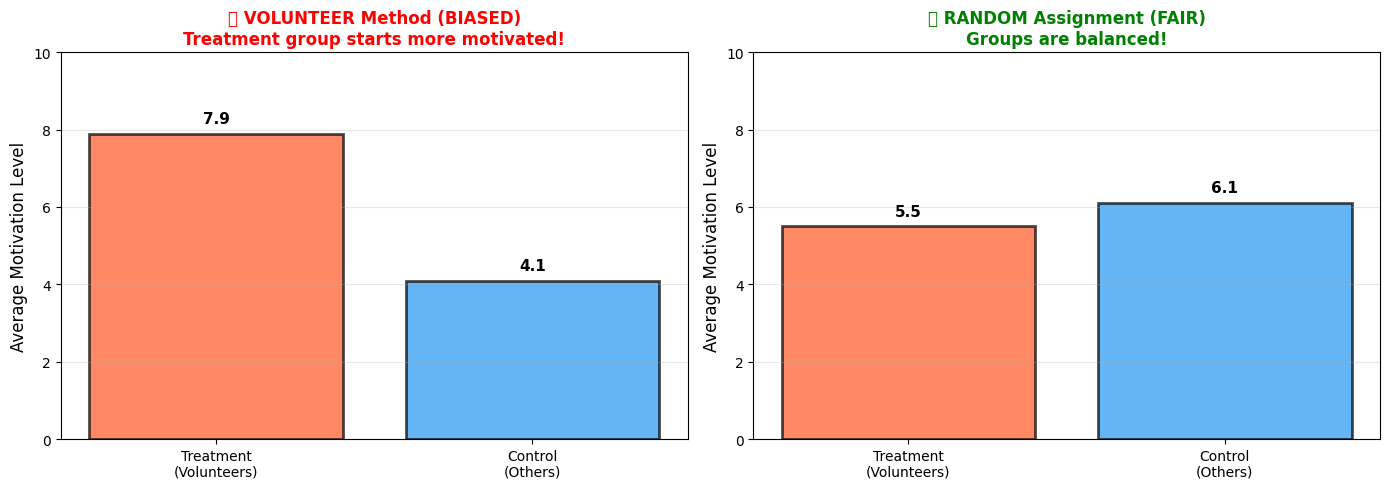


❌ VOLUNTEER METHOD (Biased):
   Treatment group motivation: 7.9
   Control group motivation: 4.1
   Difference: 3.8
   → Groups are NOT comparable!

✅ RANDOM ASSIGNMENT (Fair):
   Treatment group motivation: 5.5
   Control group motivation: 6.1
   Difference: 0.6
   → Groups ARE comparable!

→ Random assignment balances unknown factors like motivation!


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# 20 students with different motivation levels (hidden factor)
students = np.arange(1, 21)
motivation = np.random.randint(1, 11, size=20)  # Motivation score 1-10

# WRONG WAY: Let students volunteer (high motivation students choose treatment)
# Motivated students (score ≥7) volunteer for new method
volunteer_treatment = students[motivation >= 7]
volunteer_control = students[motivation < 7]

# RIGHT WAY: Random assignment
random_indices = np.random.permutation(20)
random_treatment = students[random_indices[:10]]
random_control = students[random_indices[10:]]

# Compare average motivation in each approach
volunteer_treat_motivation = motivation[motivation >= 7].mean()
volunteer_control_motivation = motivation[motivation < 7].mean()
random_treat_motivation = motivation[random_indices[:10]].mean()
random_control_motivation = motivation[random_indices[10:]].mean()

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Volunteer method
labels = ['Treatment\n(Volunteers)', 'Control\n(Others)']
means = [volunteer_treat_motivation, volunteer_control_motivation]
colors = ['#FF5722', '#2196F3']
bars1 = ax1.bar(labels, means, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax1.set_ylabel('Average Motivation Level', fontsize=12)
ax1.set_title('❌ VOLUNTEER Method (BIASED)\nTreatment group starts more motivated!', 
              fontsize=12, fontweight='bold', color='red')
ax1.set_ylim(0, 10)
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.2,
            f'{height:.1f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Random method
means2 = [random_treat_motivation, random_control_motivation]
bars2 = ax2.bar(labels, means2, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax2.set_ylabel('Average Motivation Level', fontsize=12)
ax2.set_title('✅ RANDOM Assignment (FAIR)\nGroups are balanced!', 
              fontsize=12, fontweight='bold', color='green')
ax2.set_ylim(0, 10)
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.2,
            f'{height:.1f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n❌ VOLUNTEER METHOD (Biased):")
print(f"   Treatment group motivation: {volunteer_treat_motivation:.1f}")
print(f"   Control group motivation: {volunteer_control_motivation:.1f}")
print(f"   Difference: {abs(volunteer_treat_motivation - volunteer_control_motivation):.1f}")
print("   → Groups are NOT comparable!")

print("\n✅ RANDOM ASSIGNMENT (Fair):")
print(f"   Treatment group motivation: {random_treat_motivation:.1f}")
print(f"   Control group motivation: {random_control_motivation:.1f}")
print(f"   Difference: {abs(random_treat_motivation - random_control_motivation):.1f}")
print("   → Groups ARE comparable!")
print("\n→ Random assignment balances unknown factors like motivation!")

## Real-World Example: Drug Trial for Blood Pressure Medication

A pharmaceutical company tests a new blood pressure drug on 200 patients. Let's see why randomization matters.

**Problem:** If patients choose their group (drug vs placebo), healthier patients might choose the drug because they're more health-conscious. Then better outcomes could be from starting healthier, not from the drug itself!

In [2]:
# Simulate 200 patients with different baseline health
np.random.seed(42)
n_patients = 200

# Baseline blood pressure (mmHg) - varies by patient
baseline_bp = np.random.normal(150, 15, n_patients)  # Average 150, varies

# Health-consciousness score (hidden factor)
health_consciousness = np.random.randint(1, 11, n_patients)

# SCENARIO 1: Patients self-select (biased)
# Health-conscious patients (score ≥6) choose drug
self_select_drug = health_consciousness >= 6
self_select_placebo = health_consciousness < 6

# More health-conscious = better baseline health (lower BP)
baseline_bp_adjusted = baseline_bp - (health_consciousness * 2)  # Healthier = lower BP

# Drug effect: -15 mmHg if drug, -5 mmHg if placebo (placebo effect)
outcome_self_drug = baseline_bp_adjusted[self_select_drug] - 15
outcome_self_placebo = baseline_bp_adjusted[self_select_placebo] - 5

# SCENARIO 2: Random assignment (fair)
random_assignment = np.random.rand(n_patients) < 0.5  # 50/50 split

outcome_random_drug = baseline_bp_adjusted[random_assignment] - 15
outcome_random_placebo = baseline_bp_adjusted[~random_assignment] - 5

# Calculate results
print("="*60)
print("SCENARIO 1: SELF-SELECTION (BIASED)")
print("="*60)
print(f"Baseline BP - Drug group: {baseline_bp_adjusted[self_select_drug].mean():.1f} mmHg")
print(f"Baseline BP - Placebo group: {baseline_bp_adjusted[self_select_placebo].mean():.1f} mmHg")
print(f"Baseline difference: {abs(baseline_bp_adjusted[self_select_drug].mean() - baseline_bp_adjusted[self_select_placebo].mean()):.1f} mmHg")
print("\n→ Drug group started HEALTHIER! (biased)\n")

print(f"Final BP - Drug group: {outcome_self_drug.mean():.1f} mmHg")
print(f"Final BP - Placebo group: {outcome_self_placebo.mean():.1f} mmHg")
print(f"Observed improvement: {outcome_self_placebo.mean() - outcome_self_drug.mean():.1f} mmHg")
print("\n❌ Can't trust this result - groups weren't comparable!\n")

print("="*60)
print("SCENARIO 2: RANDOM ASSIGNMENT (FAIR)")
print("="*60)
print(f"Baseline BP - Drug group: {baseline_bp_adjusted[random_assignment].mean():.1f} mmHg")
print(f"Baseline BP - Placebo group: {baseline_bp_adjusted[~random_assignment].mean():.1f} mmHg")
print(f"Baseline difference: {abs(baseline_bp_adjusted[random_assignment].mean() - baseline_bp_adjusted[~random_assignment].mean()):.1f} mmHg")
print("\n→ Groups are balanced! (fair comparison)\n")

print(f"Final BP - Drug group: {outcome_random_drug.mean():.1f} mmHg")
print(f"Final BP - Placebo group: {outcome_random_placebo.mean():.1f} mmHg")
print(f"TRUE drug effect: {outcome_random_placebo.mean() - outcome_random_drug.mean():.1f} mmHg")
print("\n✅ This result is trustworthy - random assignment worked!")

SCENARIO 1: SELF-SELECTION (BIASED)
Baseline BP - Drug group: 131.7 mmHg
Baseline BP - Placebo group: 144.2 mmHg
Baseline difference: 12.6 mmHg

→ Drug group started HEALTHIER! (biased)

Final BP - Drug group: 116.7 mmHg
Final BP - Placebo group: 139.2 mmHg
Observed improvement: 22.6 mmHg

❌ Can't trust this result - groups weren't comparable!

SCENARIO 2: RANDOM ASSIGNMENT (FAIR)
Baseline BP - Drug group: 139.4 mmHg
Baseline BP - Placebo group: 137.1 mmHg
Baseline difference: 2.3 mmHg

→ Groups are balanced! (fair comparison)

Final BP - Drug group: 124.4 mmHg
Final BP - Placebo group: 132.1 mmHg
TRUE drug effect: 7.7 mmHg

✅ This result is trustworthy - random assignment worked!


/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_62996/4106784635.py:72: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_62996/4106784635.py:72: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


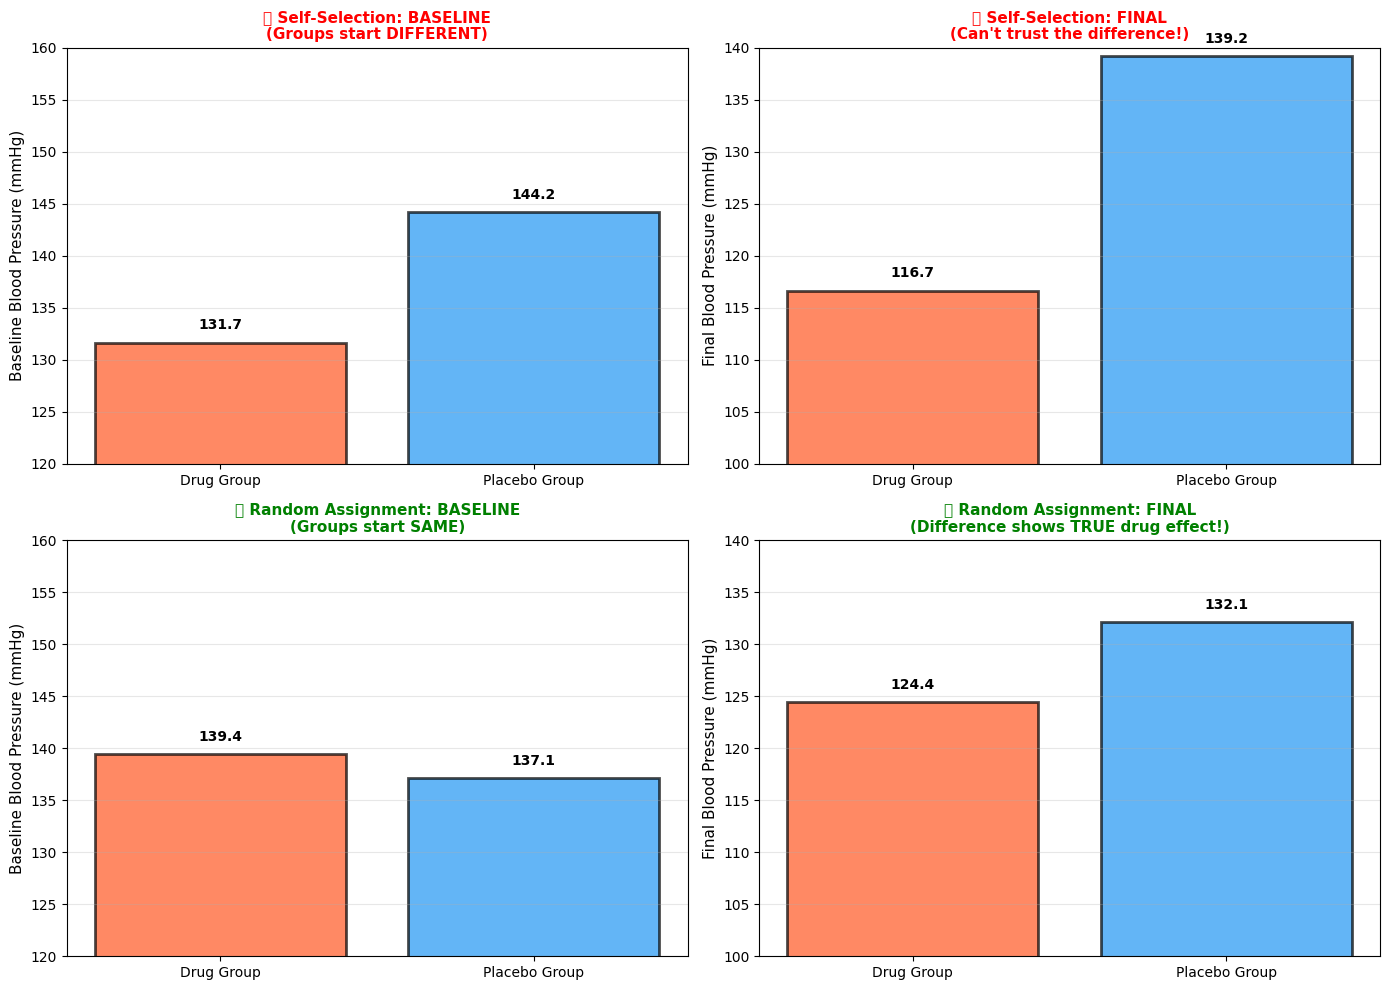


KEY INSIGHT: Randomization is the Gold Standard

→ Randomization balances KNOWN factors (age, baseline BP)
→ Randomization balances UNKNOWN factors (health habits, genetics)
→ Only randomized trials can prove cause and effect!

💊 This is why FDA requires randomized controlled trials for drug approval


In [3]:
# Visualize the difference
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top row: Self-selection (biased)
# Baseline comparison
ax1 = axes[0, 0]
baseline_means_self = [
    baseline_bp_adjusted[self_select_drug].mean(),
    baseline_bp_adjusted[self_select_placebo].mean()
]
bars1 = ax1.bar(['Drug Group', 'Placebo Group'], baseline_means_self, 
                color=['#FF5722', '#2196F3'], alpha=0.7, edgecolor='black', linewidth=2)
ax1.set_ylabel('Baseline Blood Pressure (mmHg)', fontsize=11)
ax1.set_title('❌ Self-Selection: BASELINE\n(Groups start DIFFERENT)', 
              fontsize=11, fontweight='bold', color='red')
ax1.set_ylim(120, 160)
ax1.grid(axis='y', alpha=0.3)
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Final results
ax2 = axes[0, 1]
final_means_self = [outcome_self_drug.mean(), outcome_self_placebo.mean()]
bars2 = ax2.bar(['Drug Group', 'Placebo Group'], final_means_self,
                color=['#FF5722', '#2196F3'], alpha=0.7, edgecolor='black', linewidth=2)
ax2.set_ylabel('Final Blood Pressure (mmHg)', fontsize=11)
ax2.set_title('❌ Self-Selection: FINAL\n(Can\'t trust the difference!)', 
              fontsize=11, fontweight='bold', color='red')
ax2.set_ylim(100, 140)
ax2.grid(axis='y', alpha=0.3)
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Bottom row: Random assignment (fair)
# Baseline comparison
ax3 = axes[1, 0]
baseline_means_random = [
    baseline_bp_adjusted[random_assignment].mean(),
    baseline_bp_adjusted[~random_assignment].mean()
]
bars3 = ax3.bar(['Drug Group', 'Placebo Group'], baseline_means_random,
                color=['#FF5722', '#2196F3'], alpha=0.7, edgecolor='black', linewidth=2)
ax3.set_ylabel('Baseline Blood Pressure (mmHg)', fontsize=11)
ax3.set_title('✅ Random Assignment: BASELINE\n(Groups start SAME)', 
              fontsize=11, fontweight='bold', color='green')
ax3.set_ylim(120, 160)
ax3.grid(axis='y', alpha=0.3)
for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Final results
ax4 = axes[1, 1]
final_means_random = [outcome_random_drug.mean(), outcome_random_placebo.mean()]
bars4 = ax4.bar(['Drug Group', 'Placebo Group'], final_means_random,
                color=['#FF5722', '#2196F3'], alpha=0.7, edgecolor='black', linewidth=2)
ax4.set_ylabel('Final Blood Pressure (mmHg)', fontsize=11)
ax4.set_title('✅ Random Assignment: FINAL\n(Difference shows TRUE drug effect!)', 
              fontsize=11, fontweight='bold', color='green')
ax4.set_ylim(100, 140)
ax4.grid(axis='y', alpha=0.3)
for bar in bars4:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("KEY INSIGHT: Randomization is the Gold Standard")
print("="*60)
print("\n→ Randomization balances KNOWN factors (age, baseline BP)")
print("→ Randomization balances UNKNOWN factors (health habits, genetics)")
print("→ Only randomized trials can prove cause and effect!")
print("\n💊 This is why FDA requires randomized controlled trials for drug approval")

## Summary: Why Randomization Matters

**Without randomization:**
- Groups may differ in hidden ways (motivation, health, genetics)
- Can't tell if results are from treatment or from pre-existing differences
- ❌ Can't prove cause and effect

**With randomization:**
- Groups are balanced on both known and unknown factors
- Differences in outcomes can be attributed to the treatment
- ✅ Can prove cause and effect

**Real-World Impact:** The FDA requires randomized controlled trials (RCTs) before approving new drugs. Randomization is the gold standard for proving that treatments actually work!